<a href="https://colab.research.google.com/github/nikitasavaliya87/MLOP/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-be17a401e8b3>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


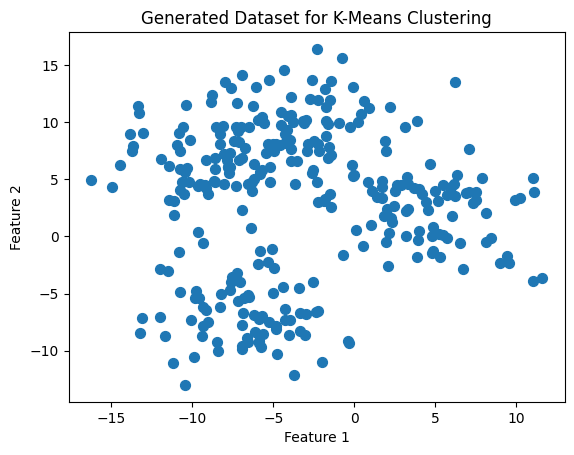

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Parameters
n_samples = 300
n_features = 2
centers = 4

# Generate data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=3, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init = 10, n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

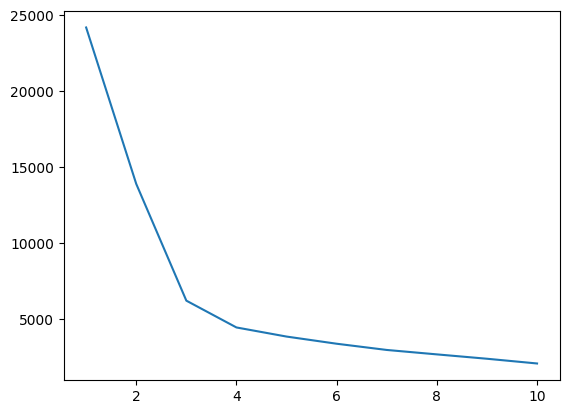

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

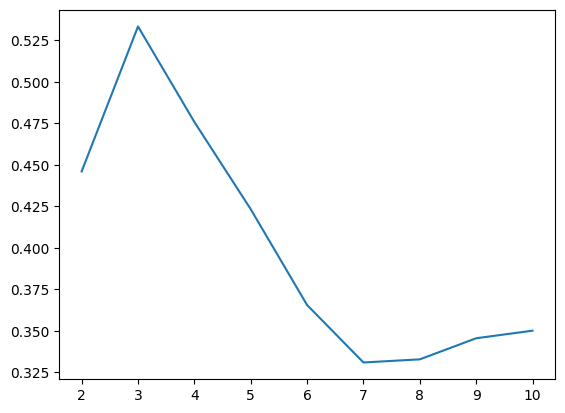

In [ ]:
plt.plot(range(2,11),sil)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_init = 10, n_clusters = 4, verbose=100)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 6473.033808617001.
Iteration 1, inertia 4529.970450579422.
Iteration 2, inertia 4485.261793377747.
Iteration 3, inertia 4476.280950769462.
Iteration 4, inertia 4475.918395021896.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 7269.787782262799.
Iteration 1, inertia 4937.615912478641.
Iteration 2, inertia 4675.371687906602.
Iteration 3, inertia 4565.51698217038.
Iteration 4, inertia 4521.120738498696.
Iteration 5, inertia 4492.562586381868.
Iteration 6, inertia 4477.333098866022.
Iteration 7, inertia 4475.918395021896.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 5833.552054345968.
Iteration 1, inertia 4720.636414164014.
Iteration 2, inertia 4580.389037563589.
Iteration 3, inertia 4521.120738498696.
Iteration 4, inertia 4492.562586381868.
Iteration 5, inertia 4477.333098866022.
Iteration 6, inertia 4475.918395021896.
Converged at iteration 6: strict conv

KMeans(n_clusters=4, n_init=10, verbose=100)

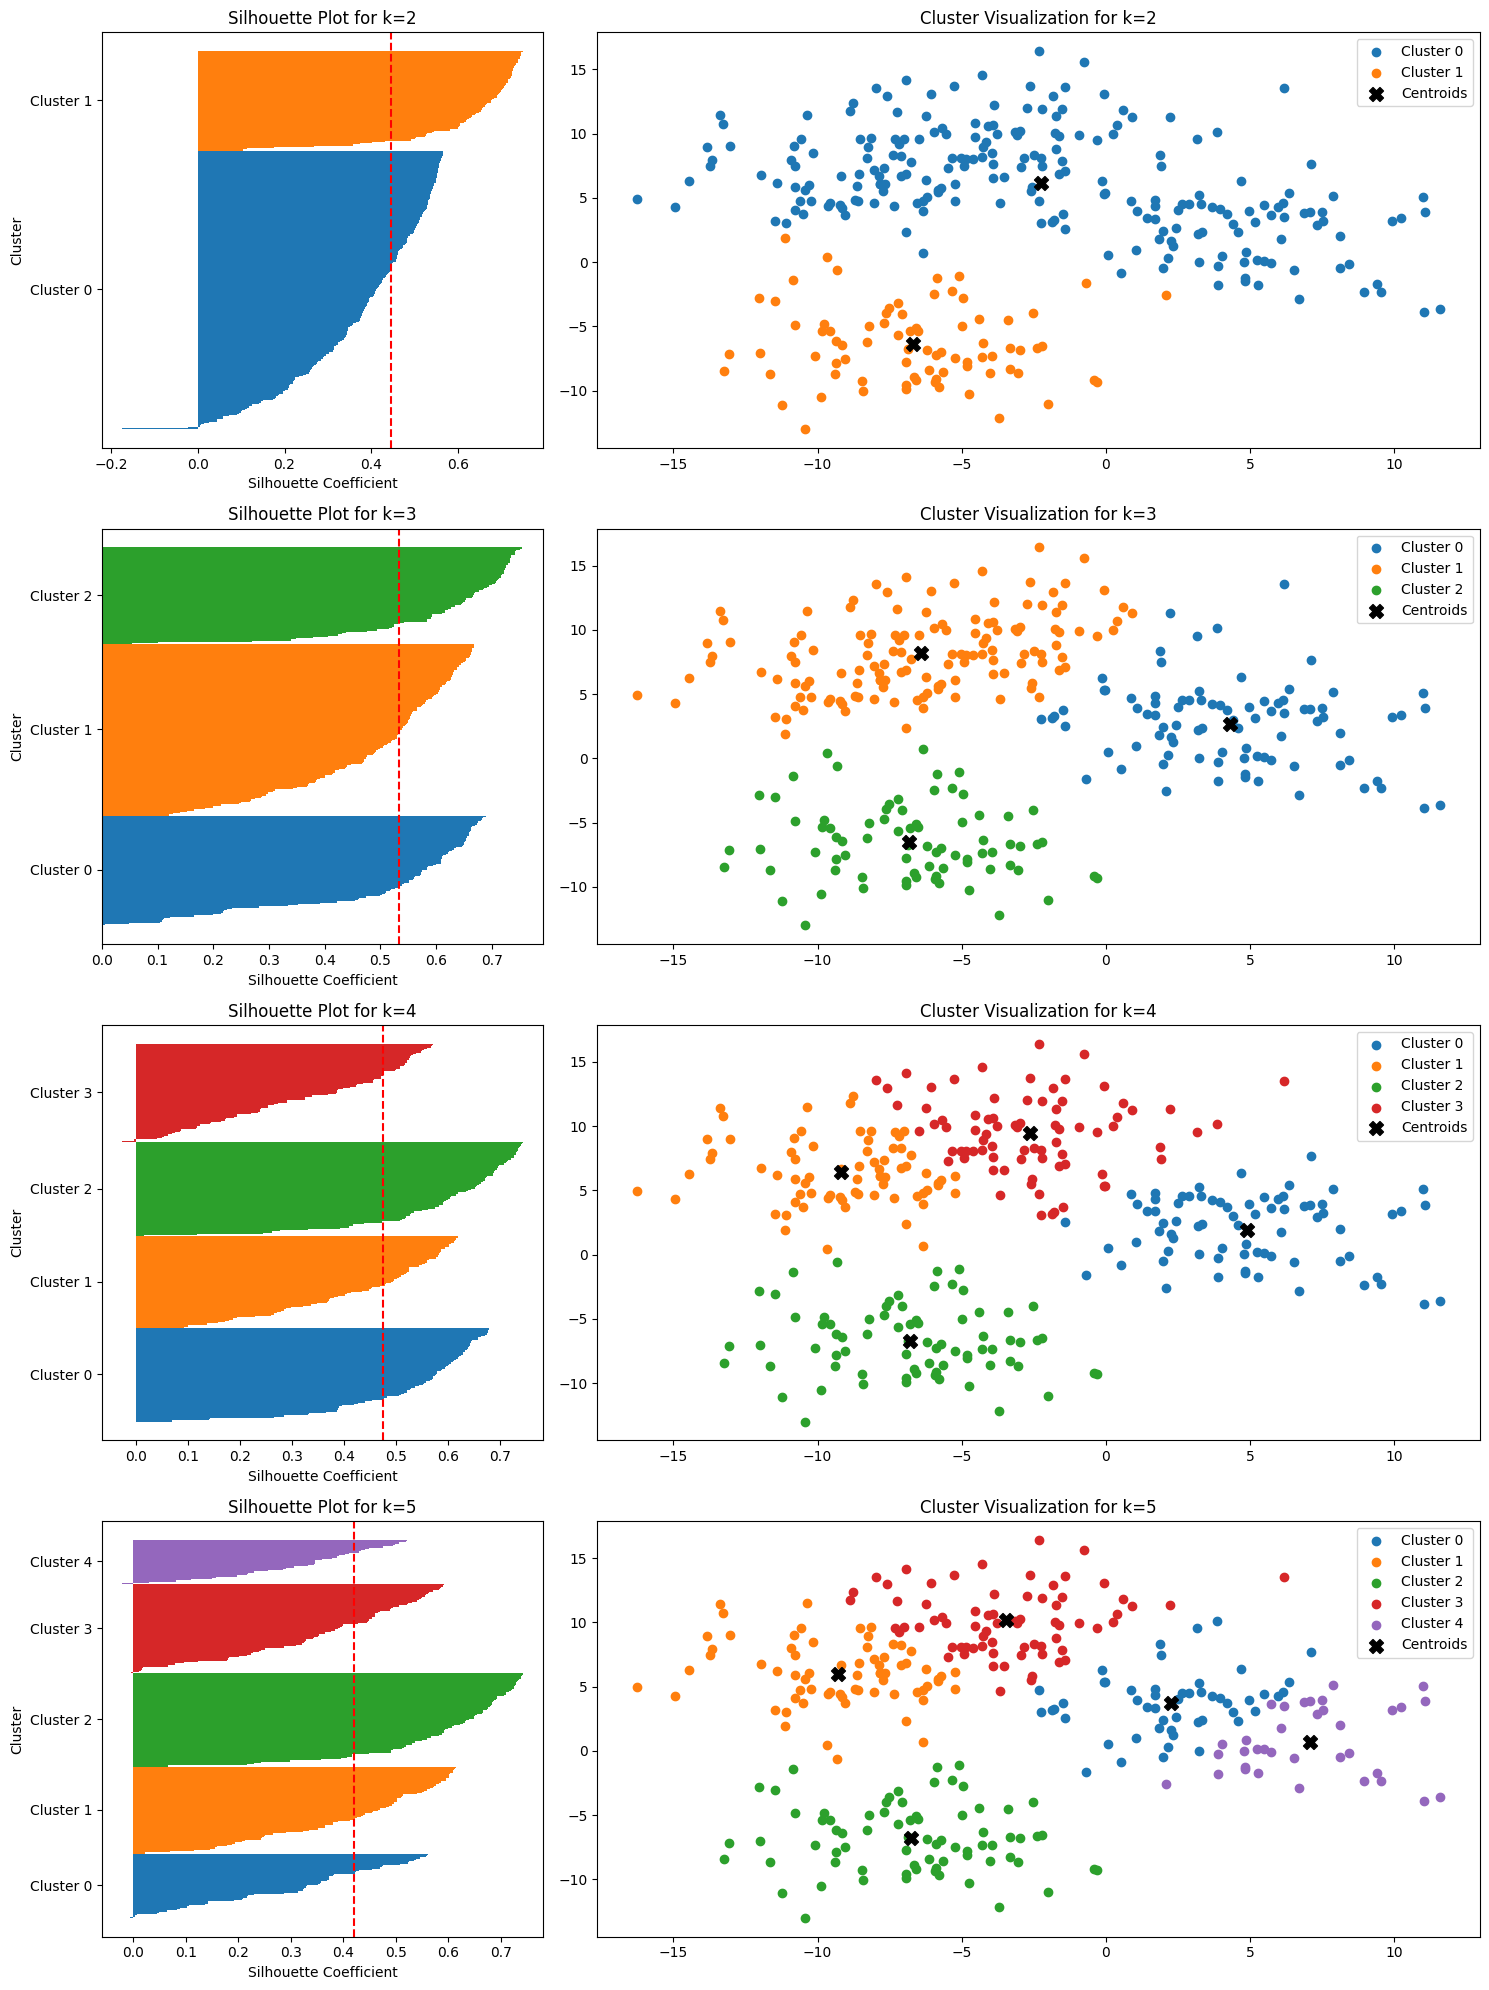

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np


# Setting up the subplot grid
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 2])

# Creating silhouette and scatter plots for different values of k (2, 3, 4, 5)
for i, k in enumerate([2, 3, 4, 5]):
    # Clustering with k-means
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)

    # Silhouette values
    silhouette_vals = silhouette_samples(X, cluster_labels)
    avg_score = silhouette_score(X, cluster_labels)

    # Silhouette plot
    ax1 = plt.subplot(gs[i, 0])
    y_lower, y_upper = 0, 0
    yticks = []
    for j, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)
    ax1.axvline(avg_score, color="red", linestyle="--")
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([f'Cluster {x}' for x in np.unique(cluster_labels)])
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Silhouette Coefficient')
    ax1.set_title(f'Silhouette Plot for k={k}')

    # Scatter plot
    ax2 = plt.subplot(gs[i, 1])
    for j in np.unique(cluster_labels):
        ax2.scatter(X[cluster_labels == j, 0], X[cluster_labels == j, 1], label=f'Cluster {j}')
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
    ax2.set_title(f'Cluster Visualization for k={k}')
    ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([3, 3, 1, 0, 3, 0, 2, 0, 1, 2, 1, 2, 1, 3, 3, 1, 3, 2, 1, 1, 2, 1,
       0, 3, 1, 1, 3, 0, 0, 2, 1, 2, 3, 2, 3, 1, 3, 0, 3, 0, 2, 1, 3, 0,
       1, 1, 3, 2, 3, 2, 0, 3, 0, 1, 0, 1, 3, 2, 2, 1, 3, 2, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 3, 2, 1, 3, 0, 0, 1, 0, 1, 1, 3, 1, 0, 3, 1, 2,
       2, 2, 3, 1, 3, 1, 1, 3, 0, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3,
       2, 1, 1, 1, 1, 2, 3, 0, 3, 0, 0, 0, 2, 3, 0, 3, 3, 1, 3, 0, 2, 3,
       1, 3, 3, 2, 2, 3, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 3, 1, 2, 0,
       1, 2, 0, 3, 3, 2, 3, 3, 0, 3, 2, 3, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0,
       0, 1, 2, 0, 3, 1, 3, 2, 2, 3, 0, 1, 0, 2, 0, 0, 0, 3, 2, 0, 0, 2,
       2, 3, 1, 1, 0, 2, 1, 0, 0, 3, 0, 1, 1, 0, 0, 2, 3, 0, 1, 3, 3, 3,
       3, 0, 3, 0, 2, 2, 3, 1, 2, 2, 2, 1, 1, 0, 2, 0, 3, 2, 1, 3, 1, 0,
       0, 2, 1, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 3, 2, 1, 3, 1, 2, 1, 3, 3,
       0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 3, 3, 0, 3, 1, 2, 2, 2, 2, 0, 3, 2,
       0, 2, 2, 0, 1, 0, 2, 1, 3, 1, 2, 3, 3, 1], d

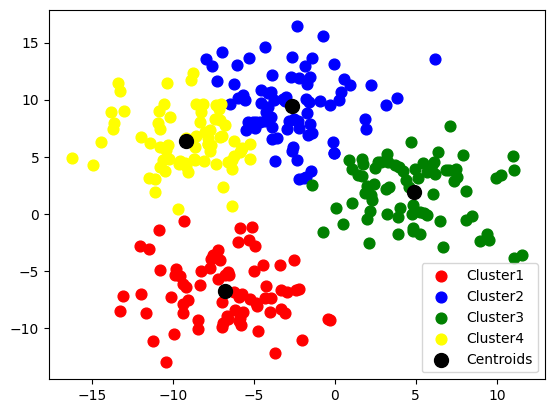

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

plt.show()

# Assignment

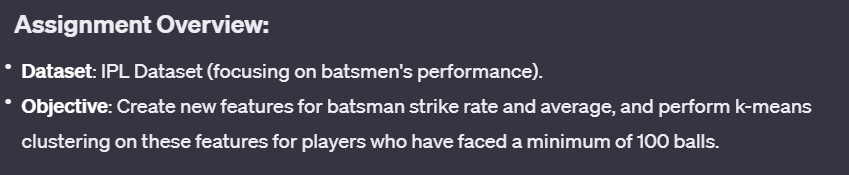

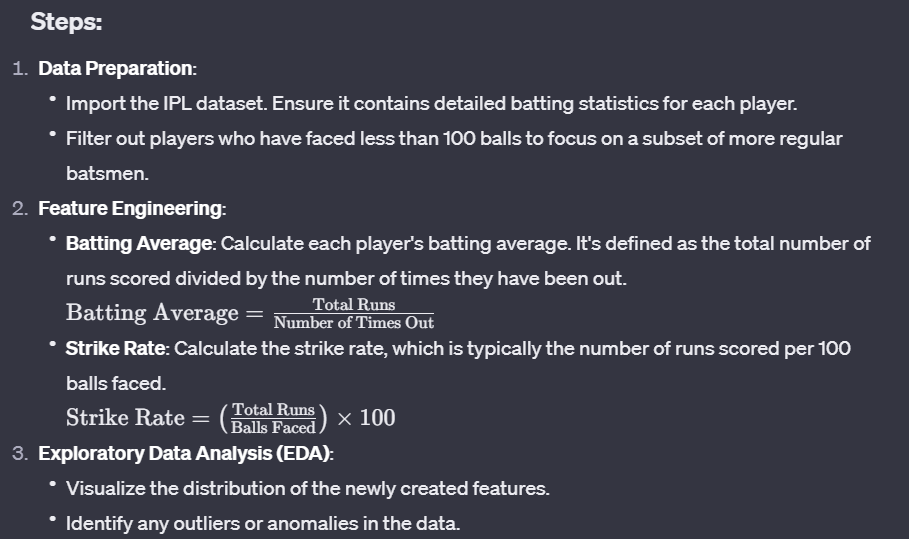

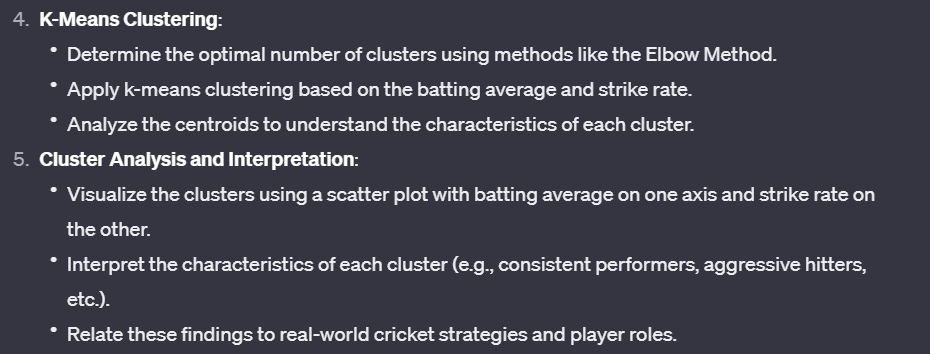

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import time

# Generating synthetic data for clustering
n_samples = 100000
n_features = 10
n_clusters = 5
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)

# Function to measure time taken by KMeans using different algorithms
def measure_kmeans_time(algorithm):
    kmeans = KMeans(n_clusters=n_clusters, algorithm=algorithm, random_state=0)
    start_time = time.time()
    kmeans.fit(X)
    return time.time() - start_time

# Measuring time for Lloyd's algorithm
lloyd_time = measure_kmeans_time('full')

# Measuring time for Elkan's algorithm
elkan_time = measure_kmeans_time('elkan')

lloyd_time, elkan_time



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(1.3539178371429443, 1.468332052230835)

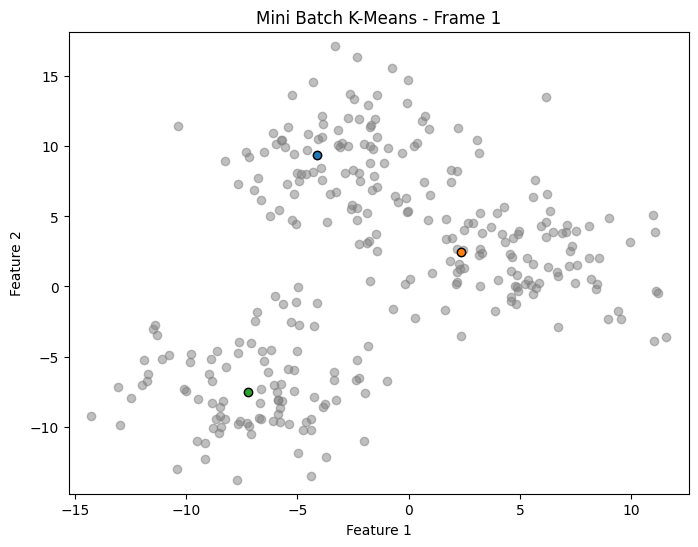

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_blobs
from IPython.display import HTML

# Function to calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Mini Batch K-Means algorithm
def mini_batch_kmeans(X, k, b, t):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    # Track centroids over time for visualization
    centroids_history = [centroids.copy()]
    # Update counts for each centroid
    v = np.zeros(k)

    # Run the algorithm for t iterations
    for i in range(t):
        # Randomly select a mini-batch
        M = X[np.random.choice(X.shape[0], b, replace=False)]
        # Update centroids with mini-batch
        for x in M:
            # Find the nearest centroid
            distances = euclidean_distance(x, centroids)
            nearest_centroid_index = np.argmin(distances)
            v[nearest_centroid_index] += 1
            eta = 1 / v[nearest_centroid_index]
            centroids[nearest_centroid_index] = (1 - eta) * centroids[nearest_centroid_index] + eta * x
            centroids_history.append(centroids.copy())

    return centroids, centroids_history

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42, cluster_std=3.0)

# Parameters for Mini Batch K-Means
k = 3  # Number of clusters
b = 10  # Batch size
t = 20  # Number of iterations

# Run Mini Batch K-Means
final_centroids, centroids_history = mini_batch_kmeans(X, k, b, t)

# Animation function
def animate(i):
    plt.cla()
    plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
    for j, c in enumerate(centroids_history[i]):
        plt.scatter(*c, color=f'C{j}', edgecolor='black')

    plt.title(f'Mini Batch K-Means - Frame {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1)
    plt.ylim(np.min(X[:,1]) - 1, np.max(X[:,1]) + 1)

# Create animation
fig = plt.figure(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=len(centroids_history), interval=100, repeat=False)

# Display the animation
HTML(ani.to_html5_video())


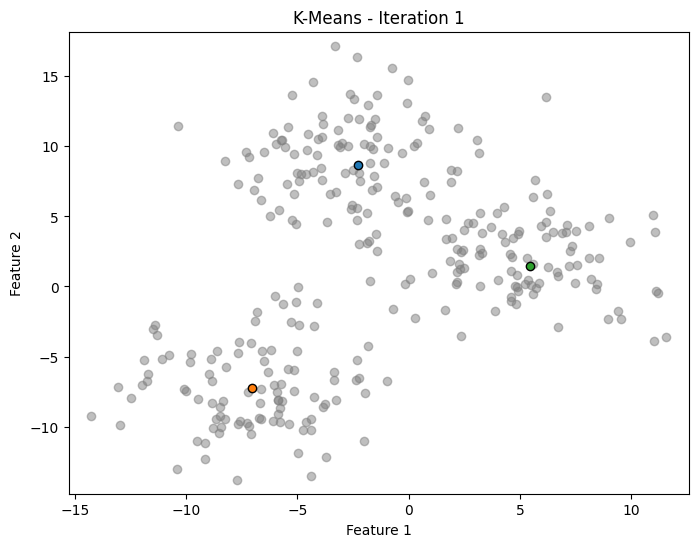

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from IPython.display import HTML

# Generate synthetic data with increased variance
X, _ = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=3.0, random_state=42)

# Parameters for K-Means
k = 3  # Number of clusters
t = 20  # Number of iterations

# Initialize KMeans
kmeans = KMeans(n_clusters=k, max_iter=1, init='random', n_init=1, random_state=42)

# Store centroids history for animation
centroids_history = []

# Run KMeans iteratively to capture centroids movement
for i in range(t):
    kmeans.max_iter += 1  # Increment the number of max iterations
    kmeans.fit(X)
    centroids_history.append(kmeans.cluster_centers_.copy())

# Animation function
def animate(i):
    plt.cla()
    plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
    for j, c in enumerate(centroids_history[i]):
        plt.scatter(*c, color=f'C{j}', edgecolor='black')

    plt.title(f'K-Means - Iteration {i+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1)
    plt.ylim(np.min(X[:,1]) - 1, np.max(X[:,1]) + 1)

# Create animation
fig = plt.figure(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=len(centroids_history), interval=500, repeat=False)

# Display the animation
HTML(ani.to_html5_video())


100/100

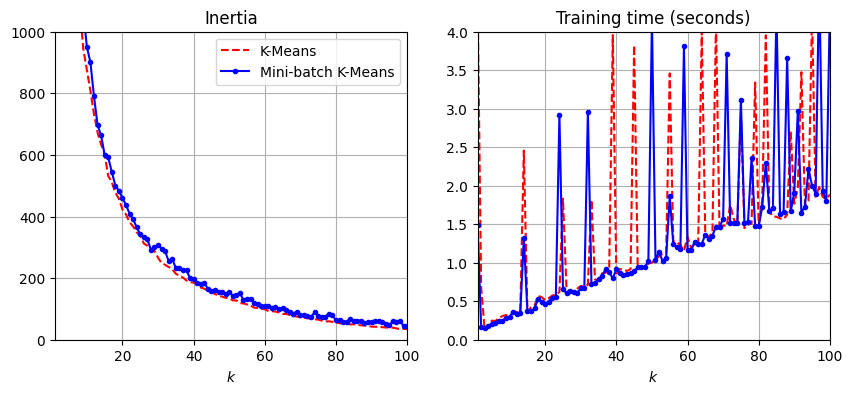

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans

# extra code – this cell generates and saves Figure 9–6

from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 1000])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()